### 2 - Where are the most expensive houses located?

In [8]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df2 = df.loc[:, ['price', 'lat', 'long', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'yr_built']]

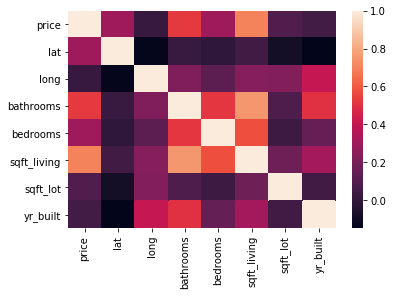

In [10]:
sns.heatmap(df2.corr());

Let's take a look at a scatter plot of the latitude x price and longitude x price

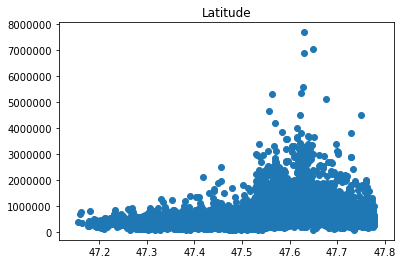

In [48]:
plt.scatter(df.lat, df.price);
plt.title('Latitude');

In [49]:
df.iloc[df.price.idxmax()]

id                    6762700020
date             20141013T000000
price                    7.7e+06
bedrooms                       6
bathrooms                      8
sqft_living                12050
sqft_lot                   27600
floors                       2.5
waterfront                     0
view                           3
condition                      4
grade                         13
sqft_above                  8570
sqft_basement               3480
yr_built                    1910
yr_renovated                1987
zipcode                    98102
lat                      47.6298
long                    -122.323
sqft_living15               3940
sqft_lot15                  8800
Name: 7252, dtype: object

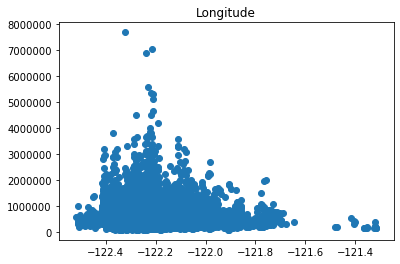

In [50]:
plt.scatter(df.long, df.price);
plt.title('Longitude');

In [51]:
np.sort(df.price)[::-1][1]

7062500.0

In [52]:
df.query('price == 7062500.0')['long']

3914   -122.214
Name: long, dtype: float64

Most expensive houses are located in the latitude of the most expensive house, which is latitude 47.6298. As for the longitude, the most expensive house seems a little off from the place where most expensive houses are located, te longitude of the second most expensive house is given by longitude -122.214.

Now let's take another approach, let's use statistics.

In [53]:
df.shape

(21613, 21)

In [54]:
np.sort(df.price)[::-1][1000]

1200000.0

In [55]:
df2 = df.query('price >= 1200000.0')

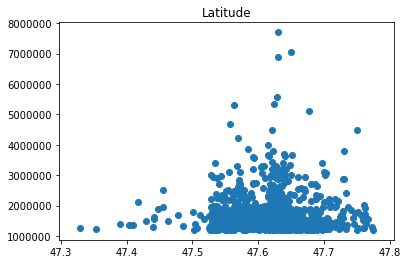

In [56]:
plt.scatter(df2.lat, df2.price);
plt.title('Latitude');

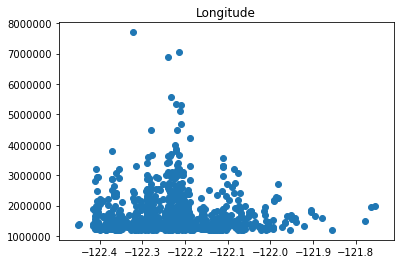

In [57]:
plt.scatter(df2.long, df2.price);
plt.title('Longitude');

In [59]:
df2.lat.mean(), df2.long.mean()

(47.617090268123185, -122.2298758689177)

It seems our first guess was right, our first estimation by peeking at the scatterplot really matches the mean of the 1000 more expensive houses:
    
    1st estimation:
        latitude: 47.629
        longitude: -122.214
    
    2nd:estimation:
        latitude: 47.617
        longitude: -122.229